# 1. Introducción
El dataset escogido es el [Student Performance Data Set](https://archive.ics.uci.edu/ml/datasets/Student+Performance), 
vale destacar que este dataset incluye las notas de matemáticas y portugués, pero en este caso solo tomaremos las notas de matemáticas, para no hacer el mismo análisis dos veces.

<span style='color:red;font-size:29px;'>Falta chamullar más en general en todo el trabajo, hay que hacer la versión gráfica en Tableau, y hay que hacer conclusiónes más largas después de cada gráfico.</span>

# Información del dataset

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).


## Attribute Information:

## Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2. sex - student's sex (binary: 'F' - female or 'M' - male) 
3. age - student's age (numeric: from 15 to 22) 
4. address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
16. schoolsup - extra educational support (binary: yes or no) 
17. famsup - family educational support (binary: yes or no) 
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19. activities - extra-curricular activities (binary: yes or no) 
20. nursery - attended nursery school (binary: yes or no) 
21. higher - wants to take higher education (binary: yes or no) 
22. internet - Internet access at home (binary: yes or no) 
23. romantic - with a romantic relationship (binary: yes or no) 
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29. health - current health status (numeric: from 1 - very bad to 5 - very good) 
30. absences - number of school absences (numeric: from 0 to 93) 

## these grades are related with the course subject, Math or Portuguese: 
31. G1 - first period grade (numeric: from 0 to 20) 
31. G2 - second period grade (numeric: from 0 to 20) 
32. G3 - final grade (numeric: from 0 to 20, output target)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import seaborn as sns
from IPython.display import display, Markdown
plt.style.use('ggplot')
%matplotlib inline

# para mostrar la información dentro del notebook más bonito.
def pretty_print(text):
    return display(Markdown(text))

In [2]:
df = pd.read_csv('data/student-mat.csv', sep=';')

display(df.head())
pretty_print("**Columnas**: %s" % ", ".join(df.columns))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


**Columnas**: school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3

# 2. Desarrollo

## 2.1.  Estudio de estadística descriptiva de dos variables

In [3]:
general_correlation = df.corr()
display(general_correlation)
# para no imprimir la doble relación
already_printed = set()

pretty_print("### Máxima correlación por variable")
final_output = "|Var1|Var2|Corr|\n"
final_output += "|:--:|:--:|:--:|\n"
for current, row in general_correlation.iterrows():
    max_correlation_i = row[row.index != current].idxmax()
    
    if (current, max_correlation_i) not in already_printed:
        final_output += "|%s|%s|%f|\n" % (current, max_correlation_i, row[max_correlation_i])
        
    already_printed.add((current, max_correlation_i))
    already_printed.add((current, max_correlation_i)[::-1])
pretty_print(final_output)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


### Máxima correlación por variable

|Var1|Var2|Corr|
|:--:|:--:|:--:|
|age|failures|0.243665|
|Medu|Fedu|0.623455|
|traveltime|Dalc|0.138325|
|studytime|G1|0.160612|
|famrel|freetime|0.150701|
|freetime|goout|0.285019|
|goout|Walc|0.420386|
|Dalc|Walc|0.647544|
|health|famrel|0.094056|
|absences|age|0.175230|
|G1|G2|0.852118|
|G2|G3|0.904868|


Se puede apreciar que existe una correlación muy alta entre `(G1, G2)` y `(G2, G3)`, pero estas se omitirán ya que son objetivo del **target**.
Nos gustaría conocer si existe alguna relación entre el `studytime` y el `G3`(Nota final), por eso escogeremos estas 2 variables.

In [5]:
final_grade = df['G3']
description_final_grade = final_grade.describe()
description_final_grade['kurtosis'] = final_grade.kurtosis()
description_final_grade['skew'] = final_grade.skew()
description_final_grade['max'] = final_grade.max()

studytime = df['studytime']
description_studytime = studytime.describe()
description_studytime['kurtosis'] = studytime.kurtosis()
description_studytime['skew'] = studytime.kurtosis()
description_studytime['max'] = studytime.max()

## formato general de la muestra de datos
text_format = """
### {title}
**Cantidad de datos**: {count: .0f}  
**Promedio**: {mean: .2f}  
**Desviación Estándar**: {std: .2f}  
**Mínimo**: {min: .0f}  
**Máximo**: {max: .0f}  
**25%**: {25%: .0f}  
**50%**: {50%: .0f}  
**75%**: {75%: .0f}  
**Sesgo**: {skew: .5f}  
**Kurtosis**: {kurtosis: .5f}  
"""


In [6]:
pretty_print(text_format.format(**description_final_grade, title="Análisis descriptivo: Nota final"))


### Análisis descriptivo: Nota final
**Cantidad de datos**:  395  
**Promedio**:  10.42  
**Desviación Estándar**:  4.58  
**Mínimo**:  0  
**Máximo**:  20  
**25%**:  8  
**50%**:  11  
**75%**:  14  
**Sesgo**: -0.73267  
**Kurtosis**:  0.40342  


Es interesante notar que el promedio se encuentra muy cercano al centro de los datos, y que el segundo cuartil esté cerca del centro.

In [7]:
pretty_print(text_format.format(**description_studytime, title="Análisis descriptivo: Tiempo de estudio"))


### Análisis descriptivo: Tiempo de estudio
**Cantidad de datos**:  395  
**Promedio**:  2.04  
**Desviación Estándar**:  0.84  
**Mínimo**:  1  
**Máximo**:  4  
**25%**:  1  
**50%**:  2  
**75%**:  2  
**Sesgo**: -0.01443  
**Kurtosis**: -0.01443  


En la descripción del dataset, se puede notar que la encuesta consideraba desde 1 hora hasta las 10 horas, sin embargo, la mayor parte del estudiantado **no superaba las dos horas** ($\overline{X} \approx 2$ y el tercer quintil es 2)

## 2.2 Visualización de cada variable

A continuación se generarán 3 gráficos descriptivos por cada variable seleccionada. Estos gráficos serán:

* Histograma
* Histograma de frecuencia acumulada (Ojiva)
* Box plot

### 2.2.1 Nota final

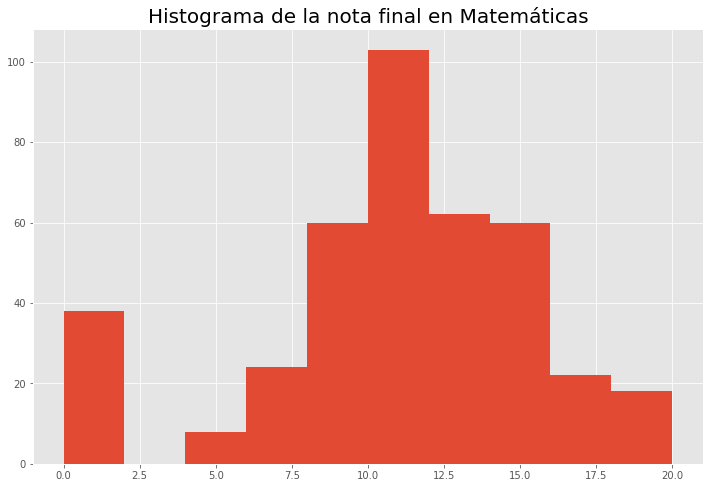

In [8]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
final_grade.hist(ax=ax)
ax.set_title("Histograma de la nota final en Matemáticas", fontsize=20)
plt.show()

Se puede ver que se aprecia una distribución normal exceptuando los valores cercanos a 0.

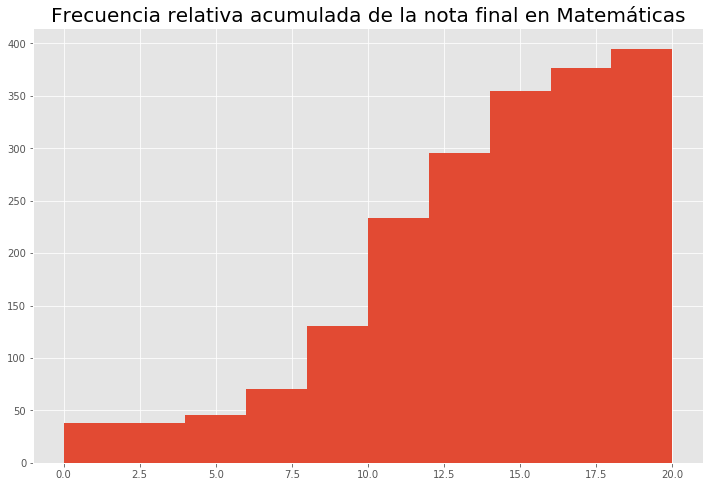

In [9]:
# Frecuencia relativa acumulada
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title("Frecuencia relativa acumulada de la nota final en Matemáticas", fontsize=20)
final_grade.hist(cumulative = True) # Frecuencia relativa acumulada
plt.show()

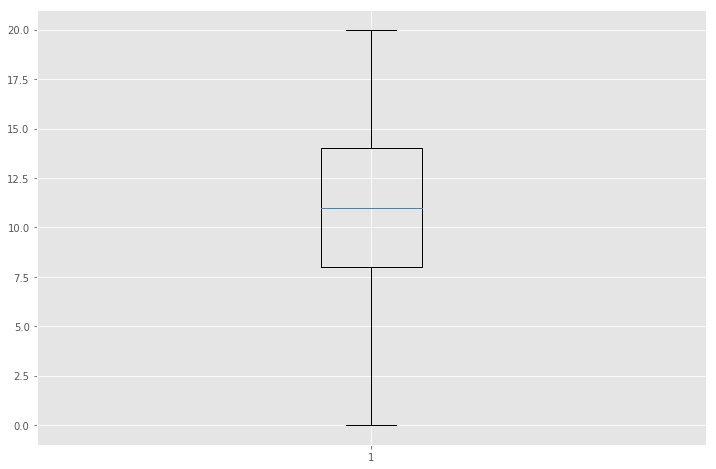

In [10]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.boxplot(final_grade)
plt.show()

### 2.2.2 Tiempo de estudio

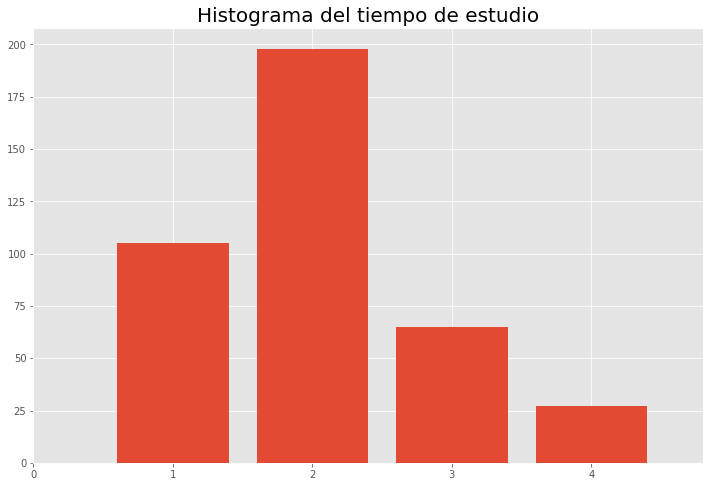

In [11]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
studytime.hist(ax=ax, bins=np.arange(studytime.min()-1, studytime.max()+1) + 0.5, width=0.8)
ax.set_xticks(np.arange(0, 5) -0.1)
ax.set_xticklabels(range(0, 5))
ax.set_title("Histograma del tiempo de estudio", fontsize=20)
plt.show()

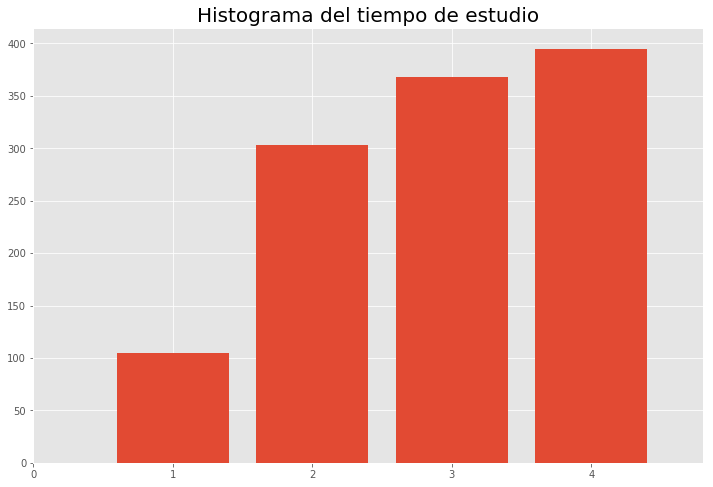

In [12]:
# Frecuencia relativa acumulada
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
studytime.hist(ax=ax, bins=np.arange(studytime.min()-1, studytime.max()+1) + 0.5, width=0.8, cumulative = True)
ax.set_xticks(np.arange(0, 5) -0.1)
ax.set_xticklabels(range(0, 5))
ax.set_title("Histograma del tiempo de estudio", fontsize=20)
plt.show()

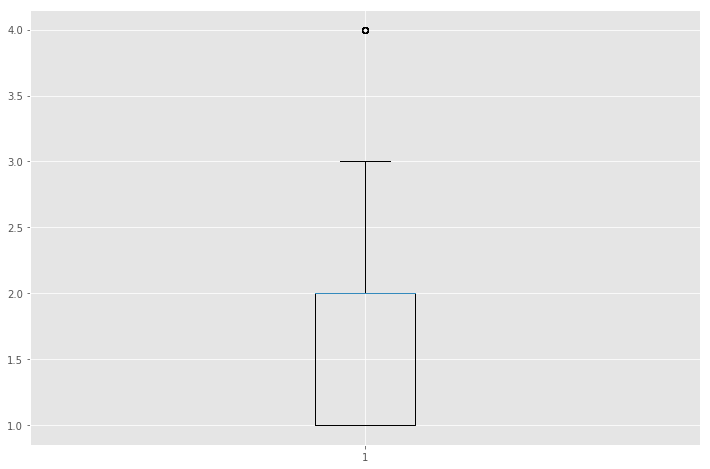

In [13]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.boxplot(studytime)
plt.show()

## Relacionando las variables
A pesar de que se ha visto que no existe un índice de correlación muy alto entre `G3` y `studytime`, se continuará a hacer un boxplot para tener una noción de _orden_ entre las dos variables.

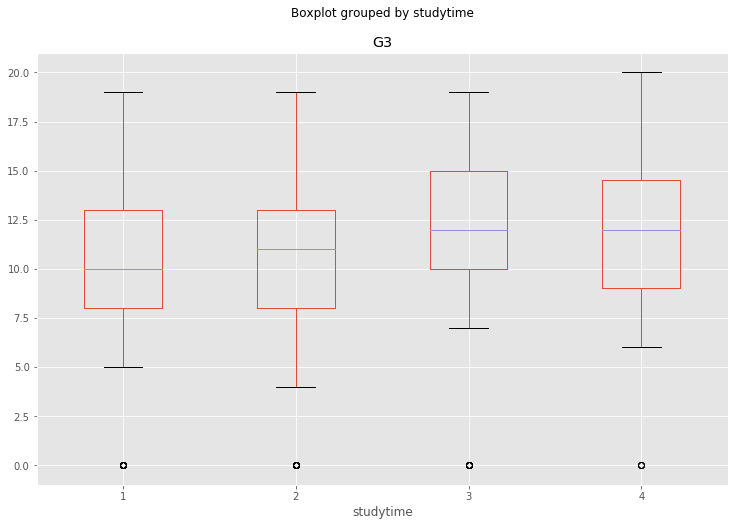

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
df.boxplot(column='G3', by='studytime', ax=ax)
plt.show()

Se puede notar una pequeña separación entre las 2 y las 3 horas de estudio respecto a la nota final, pero entre las 3 y las 4 horas de estudio no hay diferencias significativas. <span style='color:red;'>Falta chamullar más</span>